<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/hand_written_digits_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
from sklearn.metrics import classification_report

In [5]:
seed=4
tf.random.set_seed(4)

In [6]:
data = tf.keras.datasets.mnist

In [7]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [8]:
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)

In [9]:
X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train

array([5, 0, 4, ..., 4, 5, 6])

In [12]:
len(pd.unique(y_train))

10

In [13]:
valid_data = pd.read_csv('/content/train.csv')

In [14]:
test_data = pd.read_csv('/content/test.csv')

In [15]:
y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values

In [16]:
x_validation

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [17]:
y_validation

array([1, 0, 1, ..., 2, 2, 7])

In [18]:
x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)
x_test = test_data.values.reshape(test_data.shape[0], 28,28)
x_train.shape, y_train.shape, x_validation.shape, y_validation.shape,  x_test.shape


((70000, 28, 28), (70000,), (2290, 28, 28), (2290,), (8040, 28, 28))

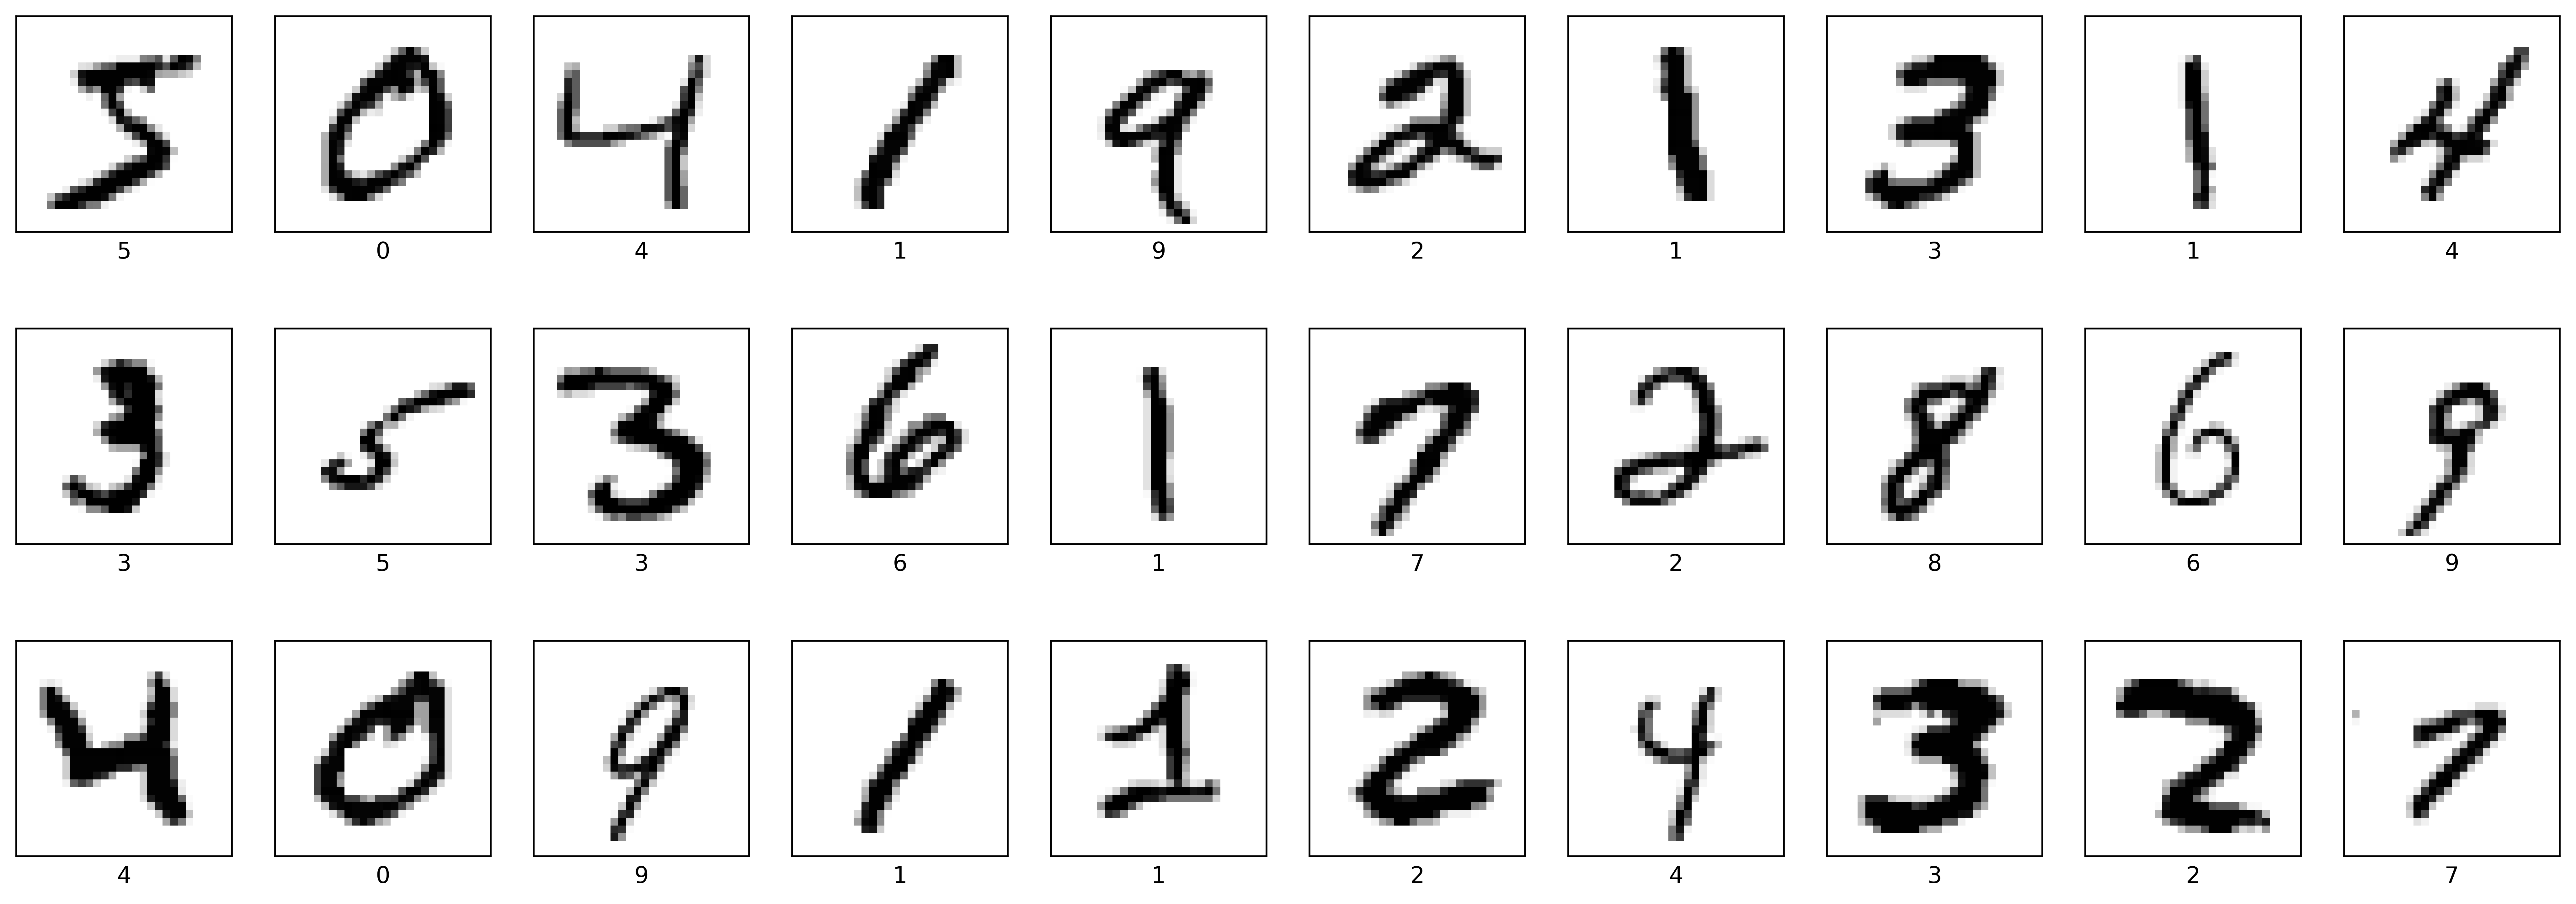

In [19]:
plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [20]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)
print('Test Data shape       :',x_test.shape)

Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (2290, 28, 28, 1)
Test Data shape       : (8040, 28, 28, 1)


In [21]:
x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255

In [22]:
y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

In [23]:
batch = 100
epochs = 10

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch

700

In [24]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)
image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [25]:
print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
There are total 10 unique digits


In [26]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        65600     
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        16448     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          6

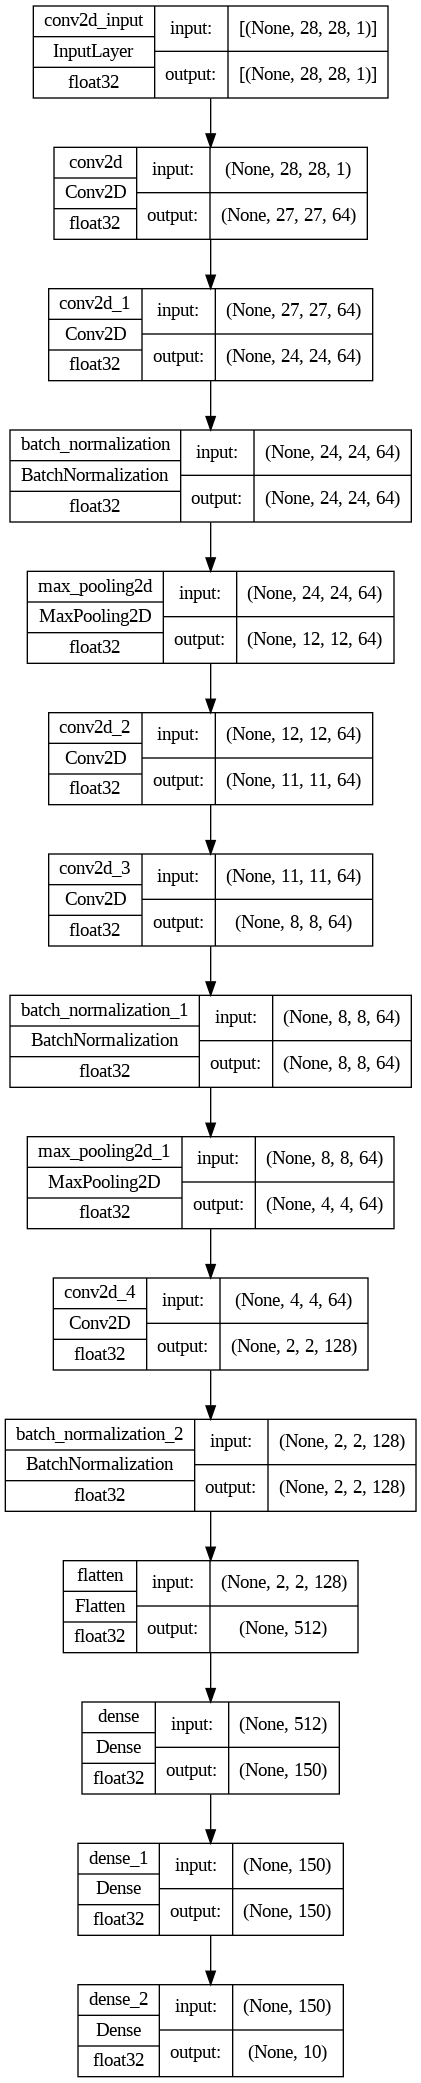

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)

In [29]:
### .et the learning rate =
lr_rate = 0.0001

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)


In [31]:

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')

In [32]:
tn = tf.keras.callbacks.TerminateOnNaN()

In [33]:

scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [34]:
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4,
                                                  verbose = 3)


In [35]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate)

In [36]:
model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])

In [37]:
history = model.fit(image_generator,
                    epochs=epochs,
                    validation_data=(x_valid, y_valid_),
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [lr_scheduler, lr_plateau, checkpoint_callback, early_stopping, tn]
                   )

Epoch 1/10
700/700 [==============================] - 33s 37ms/step - loss: 0.2381 - accuracy: 0.9340 - val_loss: 0.0466 - val_accuracy: 0.9878 - lr: 1.0000e-04
Epoch 2/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0490 - val_accuracy: 0.9852 - lr: 1.0000e-04
Epoch 3/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0162 - val_accuracy: 0.9934 - lr: 1.0000e-04
Epoch 4/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0127 - val_accuracy: 0.9974 - lr: 1.0000e-04
Epoch 5/10
700/700 [==============================] - 24s 35ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0164 - val_accuracy: 0.9943 - lr: 1.0000e-04
Epoch 6/10
700/700 [==============================] - 23s 33ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0212 - val_accuracy: 0.9934 - lr: 1.0000e-04
Epoch 7/10
700/700 [==============

In [38]:
loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')

72/72 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9974
The accuracy of model on unknown data is 99.738 %


In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [41]:
acc = history_dict['accuracy']
acc

[0.9340142607688904,
 0.9832000136375427,
 0.9877285957336426,
 0.9905714392662048,
 0.9920856952667236,
 0.992642879486084,
 0.9936142563819885]

In [42]:
loss = history_dict['loss']
loss

[0.23813794553279877,
 0.05395011976361275,
 0.039367012679576874,
 0.03068719245493412,
 0.02563849277794361,
 0.022869164124131203,
 0.01948636956512928]

In [43]:
val_acc = history_dict['val_accuracy']
val_acc

[0.9877729415893555,
 0.9851528406143188,
 0.9934498071670532,
 0.9973798990249634,
 0.9943231344223022,
 0.9934498071670532,
 0.9965065717697144]

In [44]:
val_loss = history_dict['val_loss']
val_loss

[0.04664770886301994,
 0.04904086887836456,
 0.01616448350250721,
 0.01272551342844963,
 0.01639579050242901,
 0.021169038489460945,
 0.008925622329115868]

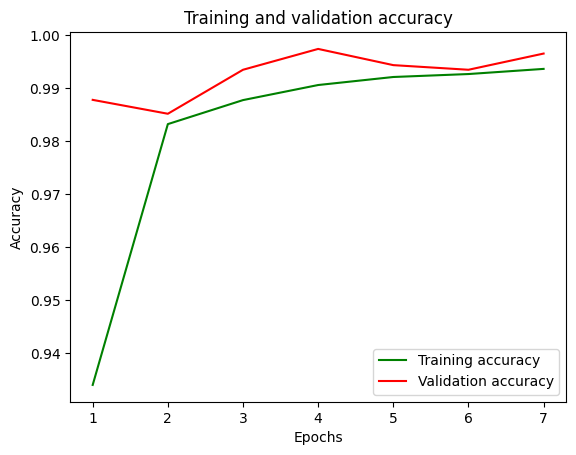

In [45]:
epochs = np.arange(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

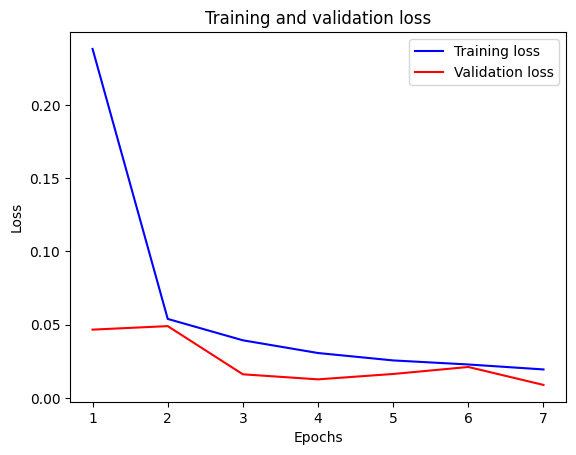

In [46]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
y_predicted = model.predict(x_valid)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',y_validation[:10])

72/72 [==============================] - 0s 2ms/step
Predicted Label : [1, 0, 1, 4, 0, 0, 7, 3, 5, 3]
Actual Label    : [1 0 1 4 0 0 7 3 5 3]


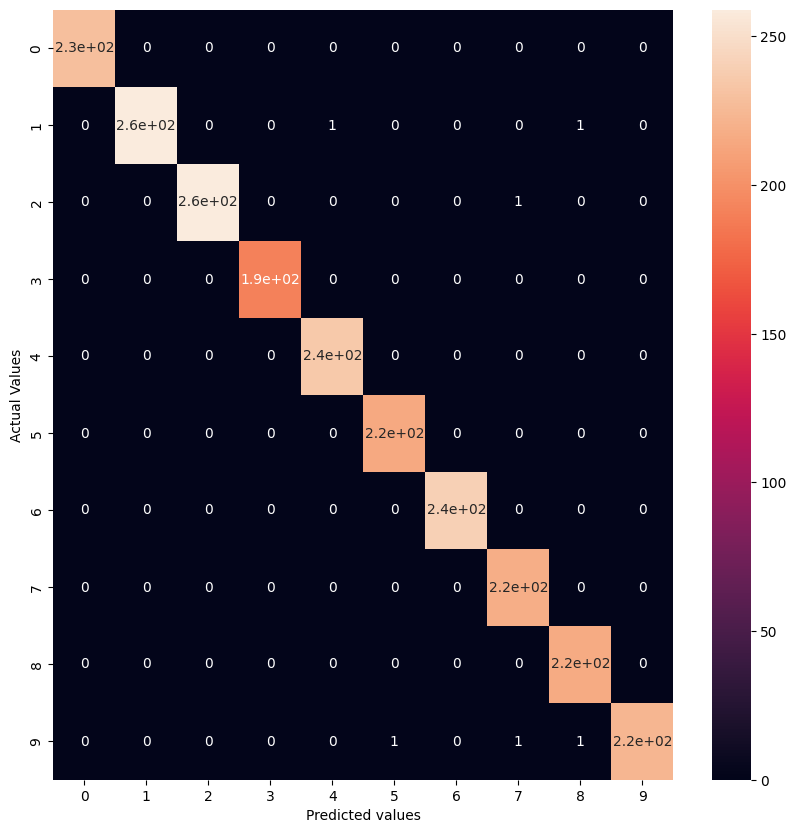

In [48]:
cm = tf.math.confusion_matrix(labels = y_validation, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [49]:
print("Classification Report: \n", classification_report(y_validation, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       260
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       191
           4       1.00      1.00      1.00       235
           5       1.00      1.00      1.00       215
           6       1.00      1.00      1.00       240
           7       0.99      1.00      1.00       218
           8       0.99      1.00      1.00       216
           9       1.00      0.99      0.99       226

    accuracy                           1.00      2290
   macro avg       1.00      1.00      1.00      2290
weighted avg       1.00      1.00      1.00      2290



In [50]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} ({:2.0f}%) \n Truth : {}".format(predicted_label, (100*np.max(predictions_array)),
                                                          true_label), color=color)



In [51]:

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


In [52]:
# for 25 images
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

In [53]:

count = 0
wrong_predictions = []
for i in range(len(y_validation)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != y_validation[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in Validation datasets')
print('Wrong predicted indices :\n',wrong_predictions)


There are 6 wrong predictions in Validation datasets
Wrong predicted indices :
 [191, 644, 799, 897, 1107, 1948]


In [56]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for i in range(num_images):
    i = wrong_predictions[i]
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 50, not 383

<Figure size 14460x7230 with 0 Axes>

In [57]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',Y_test[:10])

313/313 [==============================] - 1s 3ms/step
Predicted Label : [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Actual Label    : [7 2 1 0 4 1 4 9 5 9]


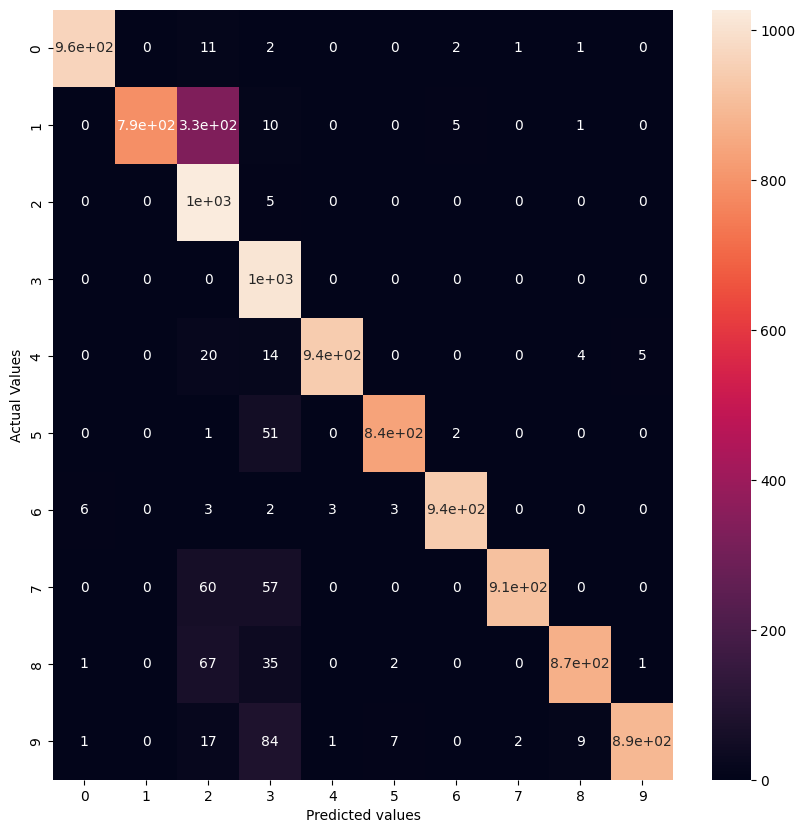

In [58]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [59]:
print("Classification Report: \n", classification_report(Y_test, y_predicted_labels)) ## 95%accuracy

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.69      0.82      1135
           2       0.67      1.00      0.80      1032
           3       0.80      1.00      0.89      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.94      0.96       892
           6       0.99      0.98      0.99       958
           7       1.00      0.89      0.94      1028
           8       0.98      0.89      0.93       974
           9       0.99      0.88      0.93      1009

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.92     10000
weighted avg       0.94      0.92      0.92     10000



In [60]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

In [61]:
count = 0
wrong_predictions = []
for i in range(len(Y_test)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != Y_test[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in test datasets')
print('Wrong predicted indices :\n',wrong_predictions)


There are 828 wrong predictions in test datasets
Wrong predicted indices :
 [15, 20, 62, 73, 104, 107, 111, 115, 137, 139, 151, 171, 184, 190, 193, 202, 204, 209, 224, 241, 247, 259, 266, 274, 307, 320, 354, 359, 388, 412, 445, 447, 448, 455, 468, 495, 510, 522, 523, 550, 551, 557, 582, 591, 593, 615, 619, 655, 667, 671, 674, 676, 684, 711, 716, 726, 759, 761, 767, 836, 840, 844, 850, 882, 898, 900, 907, 930, 947, 950, 956, 964, 965, 977, 1000, 1012, 1014, 1027, 1033, 1037, 1039, 1093, 1107, 1159, 1173, 1178, 1192, 1194, 1206, 1211, 1216, 1217, 1226, 1247, 1260, 1283, 1299, 1318, 1319, 1320, 1326, 1339, 1364, 1393, 1394, 1403, 1404, 1414, 1441, 1477, 1500, 1520, 1527, 1530, 1543, 1545, 1553, 1554, 1559, 1581, 1621, 1627, 1634, 1636, 1646, 1660, 1671, 1691, 1694, 1709, 1716, 1721, 1729, 1732, 1737, 1751, 1754, 1773, 1838, 1868, 1878, 1885, 1900, 1901, 1903, 1909, 1933, 1941, 1945, 1949, 1952, 1955, 1993, 2016, 2018, 2033, 2035, 2043, 2054, 2070, 2090, 2093, 2107, 2130, 2135, 2168, 2179,

In [62]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()